<a href="https://colab.research.google.com/github/venkateshakula77/IT7103/blob/main/IT7103_Pavan_Veera_Venkatesh_Akula_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment - 2**
**Pandas and Pipeline**

**Load the data into a Python session as a Pandas DataFrame. Check if all columns are in correct type, and fix any incorrect ones if necessary**

In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('auto-mpg.csv')

# Display the first few rows of the dataframe
print(df.head())

# Check data types of the columns
print(df.dtypes)

# Fix any incorrect column types if necessary
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')  # Convert horsepower to numeric, setting errors to NaN
df['model year'] = df['model year'].astype(int)
df['origin'] = df['origin'].astype('category')

# Check for any null values
print(df.isnull().sum())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object
mpg             0
cylinders       0
displac

**Split the data 75% training and 25% testing**

In [3]:
from sklearn.model_selection import train_test_split

# Split the data
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

print(f'Training data shape: {train_df.shape}')
print(f'Testing data shape: {test_df.shape}')

Training data shape: (298, 9)
Testing data shape: (100, 9)


**Visualize necessary columns in the data. After this point, you should have three lists:**
**Columns that are numeric and have symmetric distributions**
**Columns that are numeric and have skewed distributions**
**Columns that are categorical**

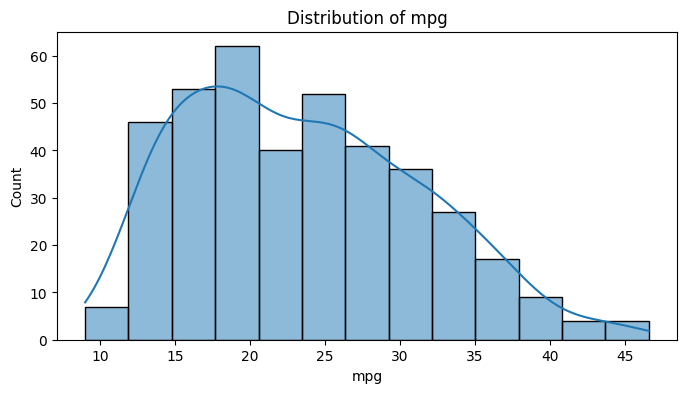

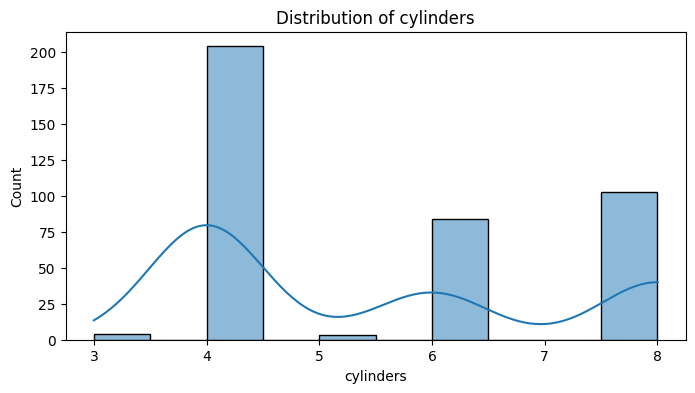

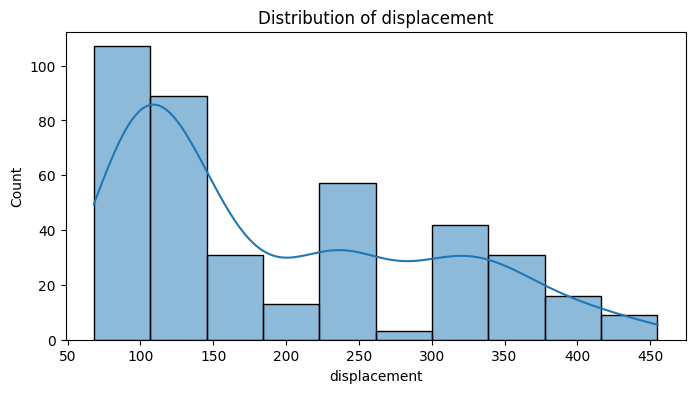

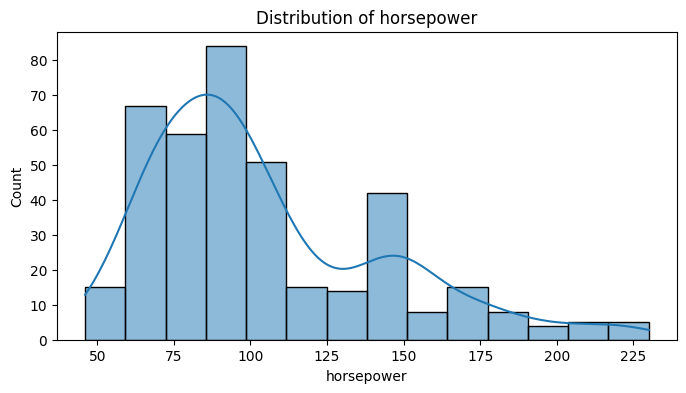

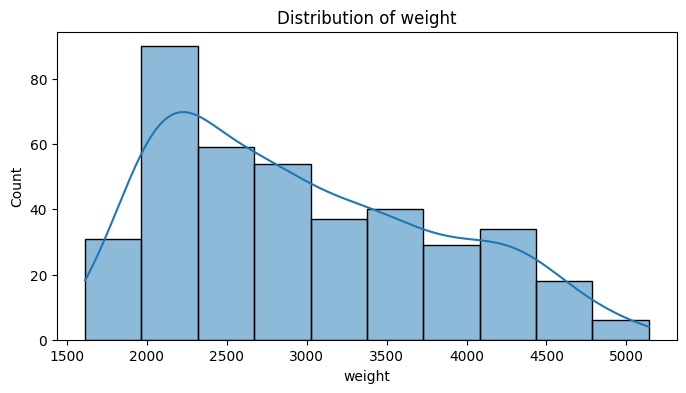

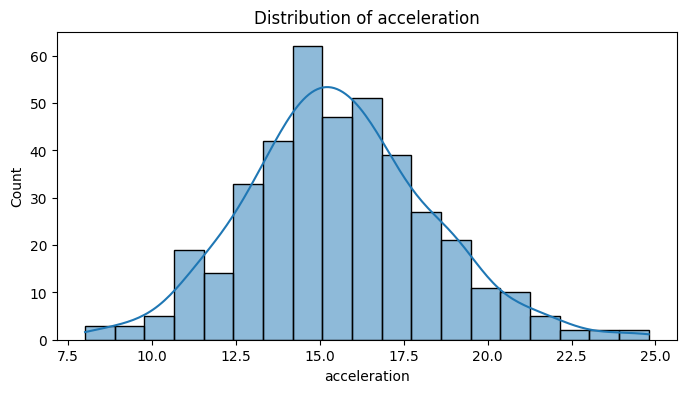

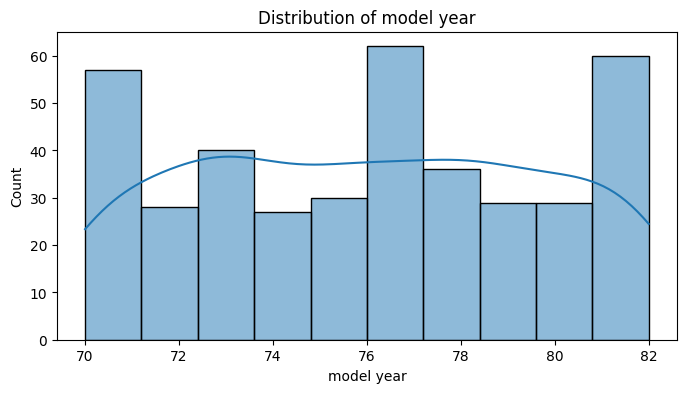

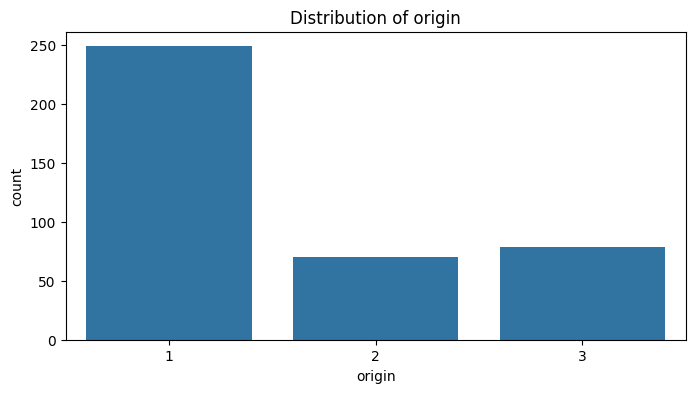

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.087326
weight          0.531063
acceleration    0.278777
model year      0.011535
dtype: float64
Columns with symmetric distributions: ['mpg', 'acceleration', 'model year']
Columns with skewed distributions: ['cylinders', 'displacement', 'horsepower', 'weight']
Categorical columns: ['origin']


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)  # Drop NaNs for visualization
    plt.title(f'Distribution of {col}')
    plt.show()

# Visualize categorical columns
categorical_columns = df.select_dtypes(include=['category']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

# Calculate skewness for numeric columns
skewness = df[numeric_columns].skew()

# Display skewness values
print(skewness)

# Identify columns with symmetric and skewed distributions
symmetric_columns = skewness[abs(skewness) < 0.5].index.tolist()
skewed_columns = skewness[abs(skewness) >= 0.5].index.tolist()

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['category']).columns.tolist()

# Output the lists
print(f'Columns with symmetric distributions: {symmetric_columns}')
print(f'Columns with skewed distributions: {skewed_columns}')
print(f'Categorical columns: {categorical_columns}')

**Build a pipeline as follows:**
**Numeric and symmetric columns:Imputation - Standardization**
**Numeric and skewed columns:Imputation - Log transformation - Standardization**
**Categorical columns:One hot encoder**


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
import numpy as np

# Identify column types
symmetric_numeric_columns = ['mpg', 'displacement', 'weight', 'acceleration']
skewed_numeric_columns = ['horsepower']
categorical_columns = ['origin']

# Define transformers for each column type
numeric_symmetric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_skewed_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transformer', FunctionTransformer(np.log1p)),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_sym', numeric_symmetric_pipeline, symmetric_numeric_columns),
        ('num_skew', numeric_skewed_pipeline, skewed_numeric_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)
# Display the structure of the preprocessor
print(preprocessor)


ColumnTransformer(transformers=[('num_sym',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['mpg', 'displacement', 'weight',
                                  'acceleration']),
                                ('num_skew',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('log_transformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('scaler', StandardScaler())]),
                                 ['horsepower']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
      

**Train the pipeline on the training data. Then perform transformation on the training data and testing data**

In [13]:
# Split the data into training and testing sets
# Exclude 'car name' column from features
X = df.drop(columns=['car name'])
y = df['mpg']  # Assuming 'mpg' is the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform the training data
X_train_processed = preprocessor.transform(X_train)

# Transform the testing data
X_test_processed = preprocessor.transform(X_test)

**Print the shape of the processed training data and processed testing data.**

In [14]:
# Output the shapes of the processed data
print(f'Shape of processed training data: {X_train_processed.shape}')
print(f'Shape of processed testing data: {X_test_processed.shape}')

Shape of processed training data: (298, 8)
Shape of processed testing data: (100, 8)
